In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"lutherlunyamwi","key":"3c50ebd7162250ab645839f8e72a706d"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [10]:
import zipfile
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

! cp /content/drive/MyDrive/mlearning.py /content/

Mounted at /content/drive


In [11]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ecommerce.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:
from mlearning import *

Streaming output truncated to the last 5000 lines.
X60 < 0.009 Gini=0.491
X60 < 0.007 Gini=0.493
X60 < 0.002 Gini=0.492
X60 < 0.002 Gini=0.492
X60 < 0.006 Gini=0.492
X60 < 0.002 Gini=0.492
X60 < 0.006 Gini=0.492
X60 < 0.021 Gini=0.483
X60 < 0.010 Gini=0.476
X60 < 0.013 Gini=0.492
X60 < 0.005 Gini=0.489
X60 < 0.003 Gini=0.491
X60 < 0.004 Gini=0.493
X60 < 0.005 Gini=0.490
X60 < 0.011 Gini=0.481
X60 < 0.004 Gini=0.493
X60 < 0.003 Gini=0.492
X60 < 0.002 Gini=0.492
X60 < 0.004 Gini=0.492
X60 < 0.004 Gini=0.492
X60 < 0.009 Gini=0.492
X60 < 0.003 Gini=0.493
X60 < 0.004 Gini=0.493
X60 < 0.005 Gini=0.490
X60 < 0.002 Gini=0.492
X60 < 0.003 Gini=0.492
X60 < 0.010 Gini=0.492
X60 < 0.004 Gini=0.493
X60 < 0.003 Gini=0.492
X60 < 0.010 Gini=0.481
X60 < 0.005 Gini=0.491
X60 < 0.013 Gini=0.492
X60 < 0.010 Gini=0.490
X60 < 0.017 Gini=0.489
X60 < 0.007 Gini=0.493
X60 < 0.010 Gini=0.488
X60 < 0.004 Gini=0.492
X60 < 0.006 Gini=0.492
X60 < 0.001 Gini=0.488
X60 < 0.007 Gini=0.491
X60 < 0.010 Gini=0.488
X60 < 

In [ ]:
# START

In [ ]:
# import the libraries required to perform our learning

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
# collect the data and store in dataset variable
dataset = pd.read_csv("Train.csv")

In [ ]:
# perform a quick scan over the data
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# let us check the dimensions of this dataset because this will help us in fitting of the data
dataset.shape

(10999, 12)

In [ ]:
# we realize that there are 12 columns let us check what this columns tell us about
dataset.info()
# we notice that we have 7 variables which we can measure against (customer care calls,
# customer ratings, cost of product, prior purchases, discount offered, weight in gms, reached on time)
# and then we have 4 indicator variables which will help us make inferences from categorized data (warehouse block, mode of shipment, 
# gender, product importance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# let us check if there is any missing data
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# we see that there is no missing data

In [ ]:
# let us get a basic statistical summary of the dataset
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# let us check how many deliveries did not reach in time
timeliness_of_deliveries = pd.DataFrame(dataset.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(dataset)).reset_index()
timeliness_of_deliveries

,Reached.on.Time_Y.N,ID
0,0,0.403309
1,1,0.596691


([<matplotlib.patches.Wedge at 0x7f40e662f110>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.3%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.7%')])

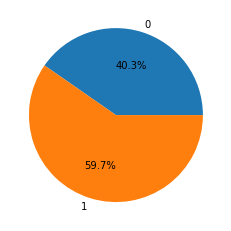

In [ ]:
plt.pie(timeliness_of_deliveries['ID'],labels=timeliness_of_deliveries['Reached.on.Time_Y.N'],autopct='%1.1f%%')

In [ ]:
# we see that 40% of the deliveries did not reach on time

In [ ]:
# let us try and check what causes delays in the deliveries
delayed_deliveries = dataset[dataset['Reached.on.Time_Y.N']==0]
delayed_deliveries

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3135,3136,B,Road,6,5,141,3,medium,M,8,5031,0
3136,3137,C,Road,3,3,219,3,low,M,4,5956,0
3137,3138,F,Road,4,3,161,3,high,M,7,4245,0
3138,3139,D,Road,4,5,225,4,medium,M,5,4622,0
3140,3141,A,Road,3,3,256,4,medium,M,3,4732,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
# our first variable to test against is the mode of shipment we can see whether the mode of shipment has 
# an effect on the lateness of the deliveries
delayed_deliveries_shipment_group=pd.DataFrame((delayed_deliveries.groupby(['Mode_of_Shipment'])['ID'].count())/len(delayed_deliveries)*100)
delayed_deliveries_shipment_group=delayed_deliveries_shipment_group.reset_index()
delayed_deliveries_shipment_group

,Mode_of_Shipment,ID
0,Flight,15.960325
1,Road,16.343553
2,Ship,67.696123


Text(0, 0.5, 'percentage')

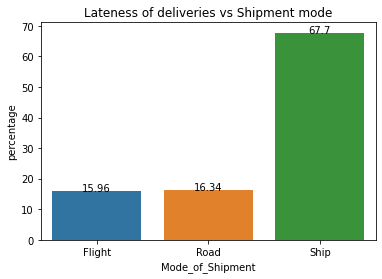

In [ ]:
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=delayed_deliveries_shipment_group )
for index, row in delayed_deliveries_shipment_group.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), ha="center")
plt.title('Lateness of deliveries vs Shipment mode')
plt.ylabel('percentage')

In [ ]:
# so we can see that 68% of the delays occur when shipment is made via ship therefore we can conclude 
# that we can use alternative means such as flight or road.

In [ ]:
# let us go to our second variable that is warehouse block
delayed_deliveries_warehouse_group=pd.DataFrame((delayed_deliveries.groupby(['Warehouse_block'])['ID'].count())/len(delayed_deliveries)*100)
delayed_deliveries_warehouse_group=delayed_deliveries_warehouse_group.reset_index()
delayed_deliveries_warehouse_group

,Warehouse_block,ID
0,A,17.087466
1,B,16.433724
2,C,16.659152
3,D,16.636610
4,F,33.183048


Text(0, 0.5, 'percentage')

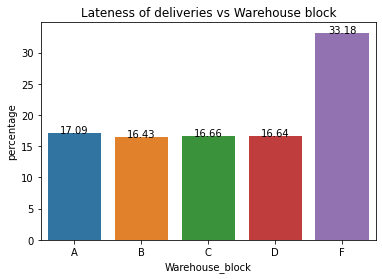

In [ ]:
visual=sns.barplot(x="Warehouse_block", y="ID", data=delayed_deliveries_warehouse_group )
for index, row in delayed_deliveries_warehouse_group.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2),ha="center")
plt.title('Lateness of deliveries vs Warehouse block')
plt.ylabel('percentage')

In [ ]:
# we can clearly see that the greatest delays recording 33.18% of the delays is through
# warehouse F, while in the other warehouses they are almost consistent throughout

Text(0.5, 1.0, 'Product importance by Reached on Time or Not')

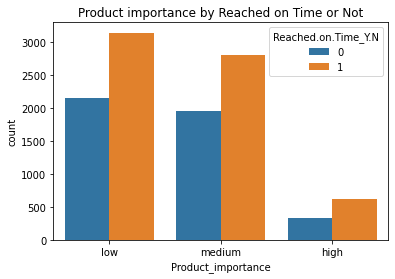

In [ ]:
# let us check the lateness of deliveries based on the importance of the product
sns.countplot(x = "Product_importance", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Product importance by Reached on Time or Not")

In [ ]:
# Most of the deliveries fall under low product importance. Very less number of highly important 
# products delivered. It means customers are ordering more number of 
# low importance products from this ecommerce group

Text(0.5, 1.0, 'Gender by Reached on Time or Not')

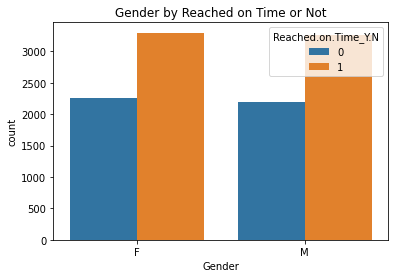

In [ ]:
# let us test lateness of deliveries based on gender
sns.countplot(x = "Gender", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Gender by Reached on Time or Not")

In [ ]:
# we see that the females have made the most orders

Text(0.5, 1.0, 'Warehouse block vs on Time or Not')

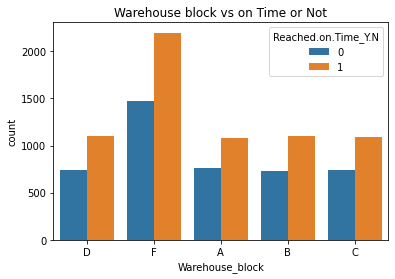

In [ ]:
# let us test lateness based on warehouse blocks
sns.countplot(x = "Warehouse_block", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Warehouse block vs on Time or Not")

In [ ]:
# we notice that warehouse block F have the most delayed orders

Text(0.5, 1.0, 'Customer ratings by Gender')

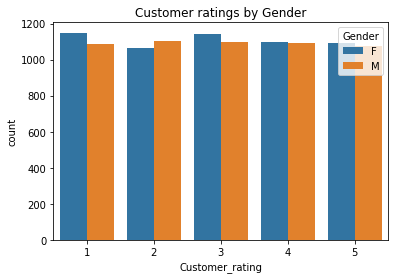

In [ ]:
# let us check which gender has rated the products the lowest
sns.countplot(x = "Customer_rating", data = dataset, hue="Gender")
plt.title("Customer ratings by Gender")

In [ ]:
# we realize that it is the females that have the most 1-star rated products

Text(0.5, 1.0, 'Amount spent by each Gender')

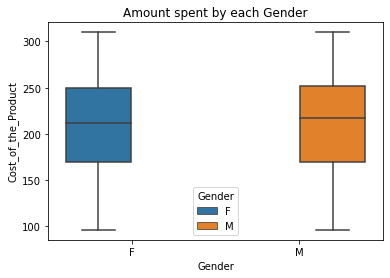

In [ ]:
# let us check the amount spent by each gender
sns.boxplot(x='Gender',y='Cost_of_the_Product',data=dataset,hue='Gender')
plt.title("Amount spent by each Gender")

In [ ]:
# it seems to be that the average spending is the same

Text(0.5, 1.0, 'Average cost of products of different importance')

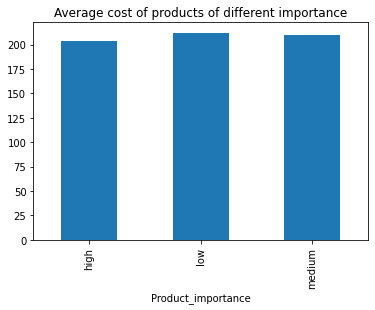

In [ ]:
# let us check the average cost of the products grouped according to their importance
dataset.groupby(['Product_importance'])['Cost_of_the_Product'].mean().plot.bar()
plt.title("Average cost of products of different importance")

In [ ]:
# we realize that the low importance products have the highest cost

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40e602b150>,
      dtype=object)

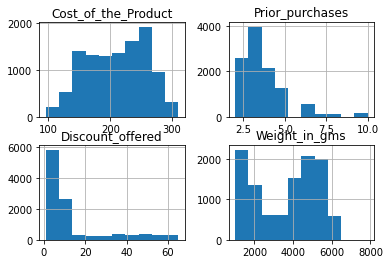

In [ ]:
dataset[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']].hist()

In [ ]:
# from the datasets we realize that discounts offered and prior purchases are positively skewed

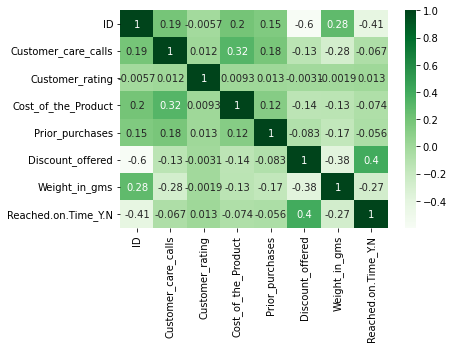

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

In [ ]:
# we notice that there is a slight positive correlation between 'cost of products' and 'customer care calls'

In [ ]:
# let us check the customer ratings dataset
customer_ratings_group=pd.DataFrame((dataset.groupby(['Customer_rating'])['ID'].count())/len(dataset)*100)
customer_ratings_group=customer_ratings_group.reset_index()
customer_ratings_group

,Customer_rating,ID
0,1,20.320029
1,2,19.683608
2,3,20.356396
3,4,19.901809
4,5,19.738158


Text(0, 0.5, 'percentage')

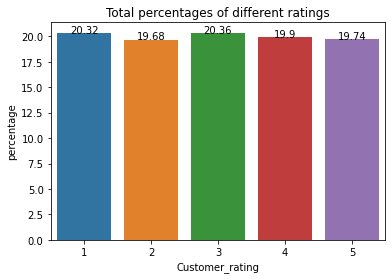

In [ ]:
visual=sns.barplot(x="Customer_rating", y="ID", data=customer_ratings_group )
for index, row in customer_ratings_group.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total percentages of different ratings')
plt.ylabel('percentage')

In [ ]:
# we see that the ratings are nearly constant and that the 5 - star rated products successfully shipped is almost 20%

In [ ]:
# let us drop the ID column because of high cardinality
data=dataset.drop(['ID'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
#Warehouse_block
crossTab = pd.crosstab(data['Warehouse_block'], data['Reached.on.Time_Y.N'])
crossTab


Reached.on.Time_Y.N,0,1
Warehouse_block,,
A,758,1075
B,729,1104
C,739,1094
D,738,1096
F,1472,2194


In [ ]:
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [ ]:
# Mode_of_Shipment
crossTab = pd.crosstab(data['Mode_of_Shipment'], data['Reached.on.Time_Y.N'])
crossTab

Reached.on.Time_Y.N,0,1
Mode_of_Shipment,,
Flight,708,1069
Road,725,1035
Ship,3003,4459


In [ ]:
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [ ]:
# Product_importance
crossTab = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
crossTab

Reached.on.Time_Y.N,0,1
Product_importance,,
high,332,616
low,2157,3140
medium,1947,2807


In [ ]:
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [ ]:
# Gender
crossTab = pd.crosstab(data['Gender'],data['Reached.on.Time_Y.N'])
crossTab

Reached.on.Time_Y.N,0,1
Gender,,
F,2249,3296
M,2187,3267


In [ ]:
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


In [ ]:
# From chi square test, we can conclude that three of the independent categorical features are not related to the response variable beacause the 
# p value is greater than 0.05. So, these features can be 
# removed and only product importance feature can be included

In [ ]:
#Renaming the column Reached.on.Time_Y.N
data.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached on Time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [ ]:
data=pd.get_dummies(data,columns=['Product_importance'], drop_first=True)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached on Time,Product_importance_low,Product_importance_medium
0,D,Flight,4,2,177,3,F,44,1233,1,1,0
1,F,Flight,4,5,216,2,M,59,3088,1,1,0
2,A,Flight,2,2,183,4,M,48,3374,1,1,0
3,B,Flight,3,3,176,4,M,10,1177,1,0,1
4,C,Flight,2,2,184,3,F,46,2484,1,0,1


In [ ]:
# generate your independent and dependent variable
X=data.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
y=data['Reached on Time']

In [ ]:
#Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
#Scaling the data
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [ ]:
# convert to dataframes
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test  =pd.DataFrame(X_test,columns=X.columns)
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_low,Product_importance_medium
0,0.2,1.0,0.383178,0.125,0.093750,0.457852,1.0,0.0
1,0.8,0.5,0.495327,0.250,0.031250,0.510592,0.0,1.0
2,0.0,1.0,0.845794,0.125,0.078125,0.004529,0.0,1.0
3,0.6,1.0,0.574766,0.000,0.046875,0.480351,0.0,1.0
4,0.8,0.5,0.934579,0.250,0.046875,0.094814,1.0,0.0


In [ ]:
# let us perform some few machine learning algorithms
# let us begin with support vector machine
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67       895
           1       0.83      0.53      0.65      1305

    accuracy                           0.66      2200
   macro avg       0.69      0.69      0.66      2200
weighted avg       0.72      0.66      0.66      2200



In [ ]:
# let us use the random forest algorithm
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       895
           1       0.74      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.67      2200



In [ ]:
# let us use the artificial neural network for prediction
ann = Sequential()
ann.add(Dense(14,input_dim=8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer='SGD',metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6693 - accuracy: 0.5984
Epoch 2/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6466 - accuracy: 0.5982
Epoch 3/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6166 - accuracy: 0.6004
Epoch 4/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5834 - accuracy: 0.6236
Epoch 5/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5620 - accuracy: 0.6400
Epoch 6/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.6435
Epoch 7/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.6441
Epoch 8/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.6492
Epoch 9/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.6505
Epoch 10/100
587/587 [==============================] - 1s 1ms/step - loss: 0.5323 - accura

In [ ]:
predictions = (ann.predict(X_test) > 0.5)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.87      0.67       895
           1       0.85      0.52      0.64      1305

    accuracy                           0.66      2200
   macro avg       0.70      0.69      0.66      2200
weighted avg       0.73      0.66      0.66      2200



In [ ]:
# therefore we realize that the best algorithm to use here shall be the ann because it gives us
# an accuracy of 66%

In [ ]:
# END

In [7]:
# deploy code to github

In [3]:
! git init

Initialized empty Git repository in /content/.git/


In [23]:
! git config --global user.email 'tutorialcreation81@gmail.com'
! git config --global user.name 'tutorialcreation'

In [4]:
! git remote add origin https://github.com/calebomariba/E-commerce-Analysis.git

In [6]:
! git remote -v

origin	https://github.com/calebomariba/E-commerce-Analysis.git (fetch)
origin	https://github.com/calebomariba/E-commerce-Analysis.git (push)


In [16]:
! git add Train.csv

In [19]:
! git commit -m 'initialized e-commerce repo'

[master (root-commit) 58539e0] initialized e-commerce repo
 1 file changed, 11000 insertions(+)
 create mode 100644 Train.csv


In [21]:
! git checkout -b main

Switched to a new branch 'main'


In [24]:
! git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
